<a href="https://colab.research.google.com/github/aolivieri/colon/blob/master/colon_colonoscopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
! git clone https://github.com/aolivieri/colon.git

fatal: destination path 'colon' already exists and is not an empty directory.


In [30]:
!ls 

colon  colon_colonoscopy.h5  sample_data


In [31]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.regularizers import l2
tf.__version__

'2.2.0'

In [32]:
import tensorflow.keras.backend as K

In [33]:
# K.clear_session()

In [34]:
# Part 1 - Data Preprocessing

# Generating images for the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

# Generating images for the Test set
#test_datagen = ImageDataGenerator(rescale = 1./255)

# Creating the Training set
training_set = train_datagen.flow_from_directory('./colon/Kvasir/kvasir-dataset-v2', 
                                                 target_size = (224, 224),
                                                 subset='training')

# Creating the Test set
test_set = train_datagen.flow_from_directory('./colon/Kvasir/kvasir-dataset-v2',
                                            target_size = (224, 224),
                                            subset='validation')

Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [35]:
a, b = training_set.next()
a.shape, b.shape

((32, 224, 224, 3), (32, 8))

In [36]:
from PIL import Image
import numpy as np

[0. 0. 0. 0. 0. 0. 1. 0.]


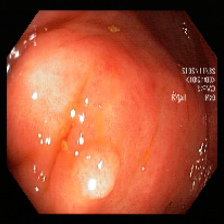

In [37]:
print(b[0])
Image.fromarray(np.uint8(255 * a[0]))

[0. 1. 0. 0. 0. 0. 0. 0.]


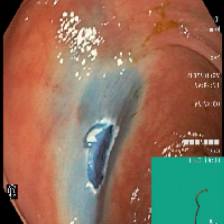

In [38]:
print(b[2])
Image.fromarray(np.uint8(255 * a[2]))

In [39]:
# Transfer Learning

from tensorflow.keras.models import *

pretrained_vgg16 = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
# Freeze all layers
for l in pretrained_vgg16.layers:
  l.trainable = False

global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()(pretrained_vgg16.output)
fc1 = tf.keras.layers.Dense(512, activation='relu')(global_avg_pool)
fc2 = tf.keras.layers.Dense(512, activation='relu')(fc1)
output = tf.keras.layers.Dense(8, activation='softmax')(fc2)

model = Model(pretrained_vgg16.input, output)

In [40]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [41]:
# Training the CNN on the Training set and evaluating it on the Test set
hist = model.fit_generator(training_set,
                  steps_per_epoch = training_set.__len__(),
                  epochs = 10,
                  validation_data = test_set,
                  validation_steps = test_set.__len__())

Epoch 1/10
200/200 [==============================] - 198s 990ms/step - loss: 1.1246 - accuracy: 0.5311 - val_loss: 0.8552 - val_accuracy: 0.6175
Epoch 2/10
200/200 [==============================] - 199s 997ms/step - loss: 0.6955 - accuracy: 0.7133 - val_loss: 0.6852 - val_accuracy: 0.7150
Epoch 3/10
200/200 [==============================] - 200s 1s/step - loss: 0.6208 - accuracy: 0.7403 - val_loss: 0.6103 - val_accuracy: 0.7350
Epoch 4/10
200/200 [==============================] - 204s 1s/step - loss: 0.5730 - accuracy: 0.7628 - val_loss: 0.5572 - val_accuracy: 0.7688
Epoch 5/10
200/200 [==============================] - 206s 1s/step - loss: 0.5453 - accuracy: 0.7758 - val_loss: 0.5719 - val_accuracy: 0.7550
Epoch 6/10
200/200 [==============================] - 204s 1s/step - loss: 0.5160 - accuracy: 0.7842 - val_loss: 0.6497 - val_accuracy: 0.7200
Epoch 7/10
200/200 [==============================] - 199s 997ms/step - loss: 0.5118 - accuracy: 0.7859 - val_loss: 0.5843 - val_accurac

In [42]:
model.save('colon_colonoscopy.h5')

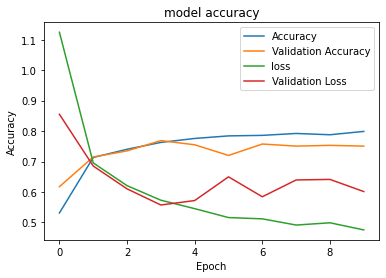

In [43]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [44]:
"""from keras.preprocessing import image
import numpy as np
#img = image.load_img("./ml-datasets/colon_image_sets/test_set/colon_aca/colonca4001.jpeg",target_size=(224,224))
#img = image.load_img("./ml-datasets/colon_image_sets/test_set/colon_n/colonn4001.jpeg",target_size=(224,224))
img = image.load_img("./colon1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from tensorflow.keras.models import load_model
saved_model = load_model("colon.h5")
output = saved_model.predict(img)
print(output)"""

'from keras.preprocessing import image\nimport numpy as np\n#img = image.load_img("./ml-datasets/colon_image_sets/test_set/colon_aca/colonca4001.jpeg",target_size=(224,224))\n#img = image.load_img("./ml-datasets/colon_image_sets/test_set/colon_n/colonn4001.jpeg",target_size=(224,224))\nimg = image.load_img("./colon1.jpg",target_size=(224,224))\nimg = np.asarray(img)\nplt.imshow(img)\nimg = np.expand_dims(img, axis=0)\n\nfrom tensorflow.keras.models import load_model\nsaved_model = load_model("colon.h5")\noutput = saved_model.predict(img)\nprint(output)'